# Plotting the band structure and projected density of states (pDOS) from FHI-aims output files

_A more detailed description of the different features is given in the example [Plotting the band structure and projected density of states (pDOS) from Quantum ESPRESSO output-files](plots-band_structure_and_pdos_qe.ipynb)._

## The band structure plot

We can read the band structures using the `read_band_structure` function in the io sub-package:

In [1]:
from aim2dat.io.fhi_aims import read_band_structure

In FHI-aims all output-files have a pre-defined name and thus, just the path to the calculation-folder needs to be given as input-parameter. Additionally, in case of a calculation with spin-orbit coupling included the optional input-parameter `soc` can be set to `True` to load the soc corrected band structure.

The function returns a dictionary containing the k-path, the eigenvalues and the occupations:

In [2]:
band_structure = read_band_structure("files/el_bands_fhi-aims")
print(band_structure.keys())

dict_keys(['kpoints', 'unit_y', 'bands', 'occupations'])


Now we can use the `BandStructurePlot` class in the plots sub-package to visualize the band structure:

In [3]:
from aim2dat.plots import BandStructurePlot

We first create an object of the class and import the band structure:

In [4]:
path_labels = [
    (0, "W"),
    (46, "L"),
    (47, "L"),
    (163, "\\Gamma"),
    (164, "\\Gamma"),
    (258, "X"),
    (259, "X"),
    (305, "W"),
    (306, "W"),
    (329, "K"),
]
bands_plot = BandStructurePlot(show_plot=True)
bands_plot.import_band_structure(
    data_label="FHI-aims_bands",
    kpoints=band_structure["kpoints"],
    path_labels=path_labels,
    bands=band_structure["bands"],
    occupations=band_structure["occupations"],
    unit_y=band_structure["unit_y"],
)

In [5]:
band_structure_soc = read_band_structure("files/el_bands_fhi-aims", soc=True)
bands_plot.import_band_structure(
    data_label="FHI-aims_bands_soc",
    kpoints=band_structure_soc["kpoints"],
    bands=band_structure_soc["bands"],
    occupations=band_structure_soc["occupations"],
    unit_y=band_structure_soc["unit_y"],
)

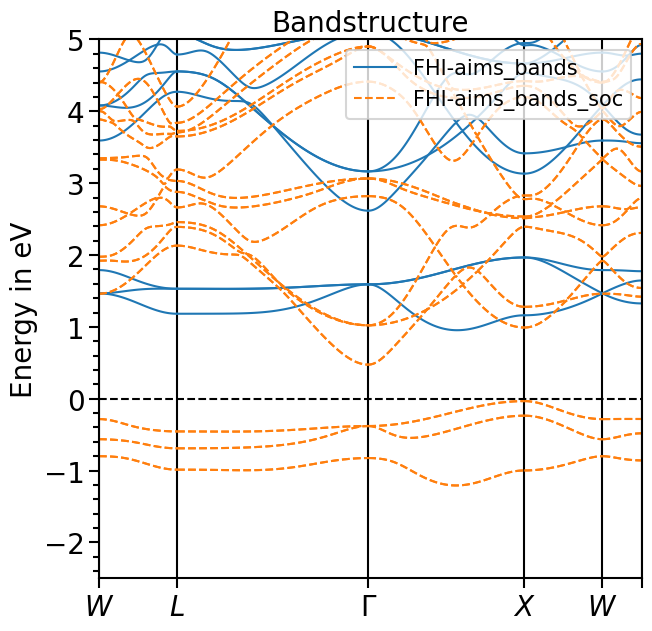

In [6]:
bands_plot.y_range = [-2.5, 5.0]
bands_plot.shift_bands("FHI-aims_bands", 2.0)
bands_plot.show_legend = True
bands_plot.custom_linestyles = ["-", "--"]
plot = bands_plot.plot(["FHI-aims_bands", "FHI-aims_bands_soc"], plot_title="Bandstructure")

## The projected density of states plot

The procedure to plot the projected density of states is very similar to plotting the band structure. There is a function in the `io` sub-package to parse the projected density of states from the output-files.

Using the keyword `load_raw` the raw version of the pDOS or the shifted pDOS can be read. Also, similar to the band structure with the keyword `soc` the pDOS including spin-orbit coupling will be read.

In this case the path to the folder needs to be given. Based on the standard pattern of the file names of FHI-aims the corresponding files are read and the information is parsed:

In [7]:
from aim2dat.io.fhi_aims import read_atom_proj_density_of_states

pdos = read_atom_proj_density_of_states("files/el_pdos_fhi-aims/", load_raw=True)

print(pdos["pdos"][0].keys())

dict_keys(['element', 's', 'p', 'd', 'f'])


Next, an object of the `DOSPlot`-class is created and the pojected density of states can be loaded. We shift the pDOS straight-away such that the valence band maximum is at 0 eV with the parameter `shift_dos`.

The parameters `sum_kinds`, `sum_principal_qn` and `sum_magnetic_qn` sum up over different atoms of the same element, the principal and magnetic quantum numbers, respectively.

In [8]:
from aim2dat.plots import DOSPlot

dos_plot = DOSPlot()
dos_plot.import_projected_dos(
    "test_pdos",
    pdos["energy"],
    pdos["pdos"],
    shift_dos=4.95590811,
    sum_kinds=False,
    sum_principal_qn=True,
    sum_magnetic_qn=True,
)

Likewise to the band structure plot, we can plot the pDOS using the `plot` function. s-orbitals are solid lines, p-orbitals, dashed, d-orbitals dotted and f-orbitals dash-dotted.
The colors and line styles can be changed with the attributes `dos_colors` and `dos_linestyles`, respectively.

The input parameters are the same as before and with the class's attributes the range and other features of the plot can be adjusted:

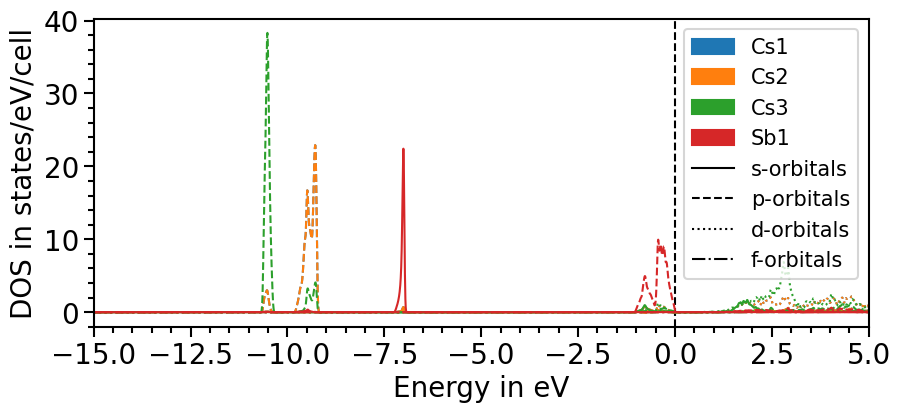

In [9]:
dos_plot.show_plot = True
dos_plot.show_legend = True
dos_plot.x_range = (-15, 5)
plot = dos_plot.plot("test_pdos")

There are two options to include the total density of states:

* All projected densities can be summed. Depending on the basis set and how well it can be projected onto the localized orbitals this may not always lead to the total density of states.
* The total density of states can be imported for a dataset as before done with the projected DOS.

Here is the first option:

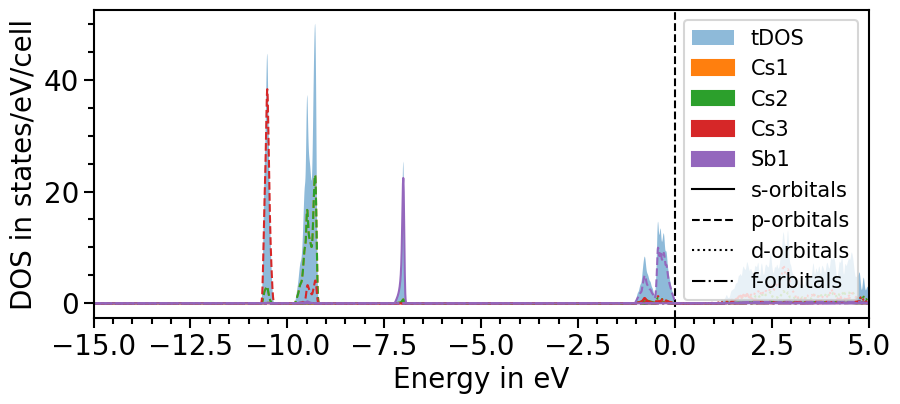

In [10]:
dos_plot.sum_pdos = True
plot = dos_plot.plot("test_pdos")

The second option involves another function of the `io` sub-package to parse the total density of states directly from the output-file:

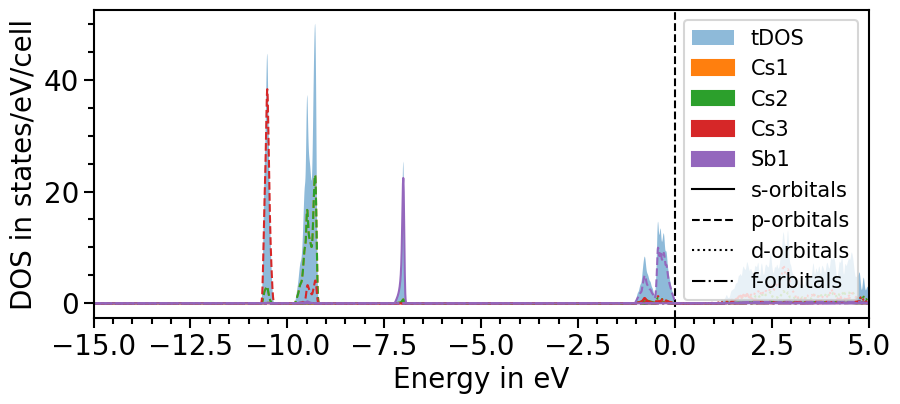

In [11]:
from aim2dat.io.fhi_aims import read_total_density_of_states

tdos = read_total_density_of_states("files/el_pdos_fhi-aims/KS_DOS_total_raw.dat.no_soc")

dos_plot.import_projected_dos(
    "test_pdos_2",
    pdos["energy"],
    pdos["pdos"],
    shift_dos=4.95590811,
    sum_kinds=False,
    sum_magnetic_qn=True,
)
dos_plot.import_total_dos("test_pdos_2", tdos["energy"], tdos["tdos"], shift_dos=4.95590811)
plot = dos_plot.plot("test_pdos_2")

## Band structure + projected density of states plot

The two previous plots can also be combined in one figure with the `BandStructureDOSPlot` class:

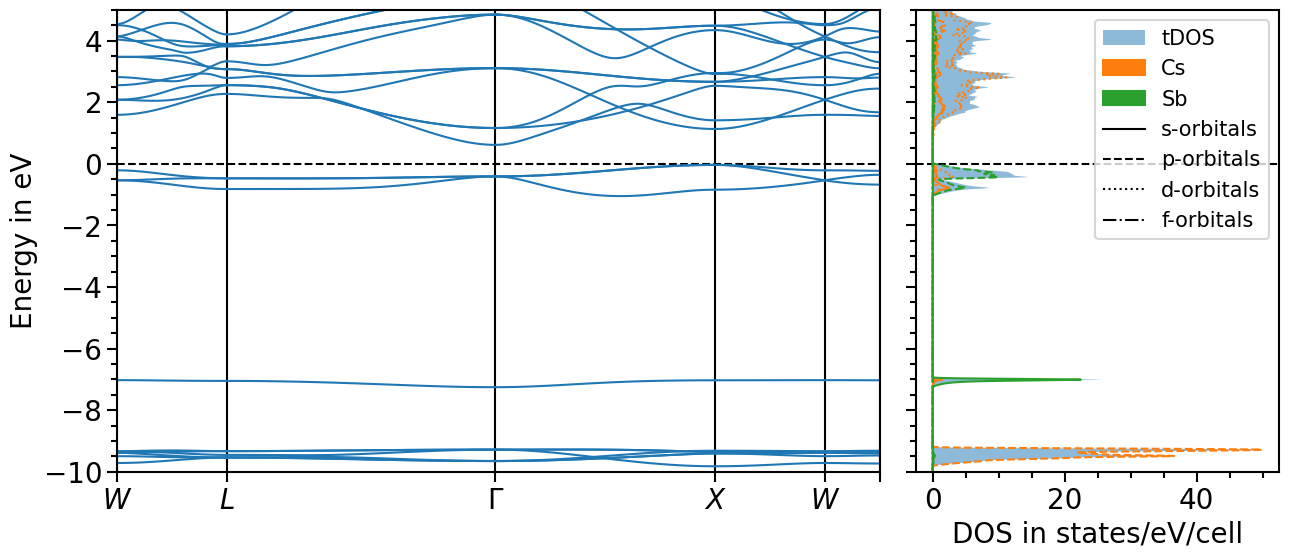

In [12]:
from aim2dat.plots import BandStructureDOSPlot

bands_dos_plot = BandStructureDOSPlot()
bands_dos_plot.ratio = (15, 6)
bands_dos_plot.y_range = (-10, 5)
bands_dos_plot.show_plot = True
bands_dos_plot.import_band_structure(
    "test_band_structure_dos",
    kpoints=band_structure["kpoints"],
    path_labels=path_labels,
    bands=band_structure["bands"],
    unit_y=band_structure["unit_y"],
)
bands_dos_plot.import_projected_dos(
    "test_band_structure_dos", pdos["energy"], pdos["pdos"], shift_dos=4.95590811, sum_kinds=True
)
bands_dos_plot.import_total_dos(
    "test_band_structure_dos",
    tdos["energy"],
    tdos["tdos"],
    shift_dos=4.95590811,
)
plot = bands_dos_plot.plot("test_band_structure_dos")